In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# %matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\NIDHI\OneDrive\\Documents\\Projects folder\\Anti phishing\\Phishing_Legitimate_full.csv')

# Data Overview

In [3]:
# First 5 sample rows of Dataset
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
# Name of columns
list(df.columns)

['id',
 'NumDots',
 'SubdomainLevel',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumDashInHostname',
 'AtSymbol',
 'TildeSymbol',
 'NumUnderscore',
 'NumPercent',
 'NumQueryComponents',
 'NumAmpersand',
 'NumHash',
 'NumNumericChars',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'HttpsInHostname',
 'HostnameLength',
 'PathLength',
 'QueryLength',
 'DoubleSlashInPath',
 'NumSensitiveWords',
 'EmbeddedBrandName',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'PctNullSelfRedirectHyperlinks',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'AbnormalExtFormActionR',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT',
 'CLASS_LABEL']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

You can see that there are no missing values in the Dataset

In [6]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains:			[0 1 2 4 3 5 7 6 9 8]
AtSymbol contains:			[0 1]
TildeSymbol contains:			[0 1]
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains:			[0 1]
NumNumericChars has 82 unique values
NoHttps contains:			[1 0]
RandomString contains:			[0 1]
IpAddress contains:			[0 1]
DomainInSubdomains contains:			[0 1]
DomainInPaths contains:			[0 1]
HttpsInHostname contains:			[0]
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains:			[0 1]
NumSensitiveWords contains:			[0 1 2 3]
EmbeddedBrandName contains:			[0 1]
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains:

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

# EDA 📈📊📉

Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling

In [7]:
df = df.drop(columns=['id'])

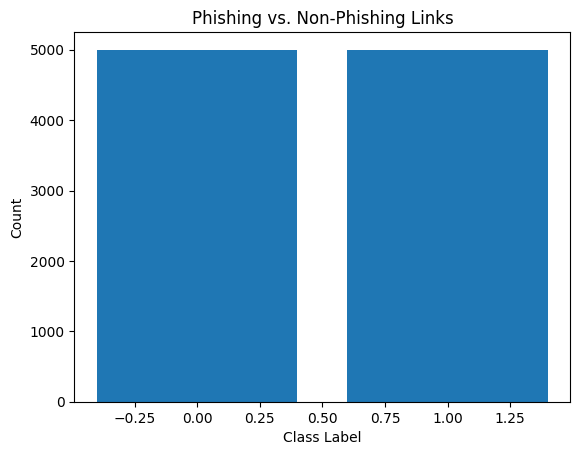

In [8]:
class_counts = df['CLASS_LABEL'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Phishing vs. Non-Phishing Links')

# Display the chart
plt.show()


The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

Note that feature `popUpWindow` and `favicon` are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.

Note that some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

# MODELLING 💇‍♀️

We will be using a simple tree based classifier and no hyper-parameter tuning to model and test our dataset. Note that we replace -1 with 0 and 0 marks phishing website.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

# Splitting the data into features and target
target = df['CLASS_LABEL']
features = df.drop(['CLASS_LABEL', 'RelativeFormAction', 'DoubleSlashInPath', 'HttpsInHostname', 'DomainInSubdomains', 'FakeLinkInStatusBar', 'RandomString', 'EmbeddedBrandName', 'AtSymbol', 'ImagesOnlyInForm', 'NumHash', 'AbnormalFormAction', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'PopUpWindow', 'RightClickDisabled', 'IpAddress', 'SubdomainLevelRT', 'TildeSymbol'], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Creating and fitting the models
xgb_model = xgb.XGBClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()

In [11]:
# Fitting the models
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ab_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
gnb_model.fit(X_train, y_train)

c:\Python 311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [12]:
# Making predictions
xgb_pred = xgb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
gnb_pred = gnb_model.predict(X_test)

In [13]:
# Evaluating the models
xgb_accuracy = accuracy_score(y_test, xgb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

In [14]:
print("XGBoost Accuracy:", xgb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("GaussianNB Accuracy:", gnb_accuracy)

XGBoost Accuracy: 0.99
Decision Tree Accuracy: 0.9745
Random Forest Accuracy: 0.9855
Logistic Regression Accuracy: 0.9285
Gradient Boosting Accuracy: 0.982
AdaBoost Accuracy: 0.975
SVM Accuracy: 0.8575
KNN Accuracy: 0.8735
GaussianNB Accuracy: 0.8565


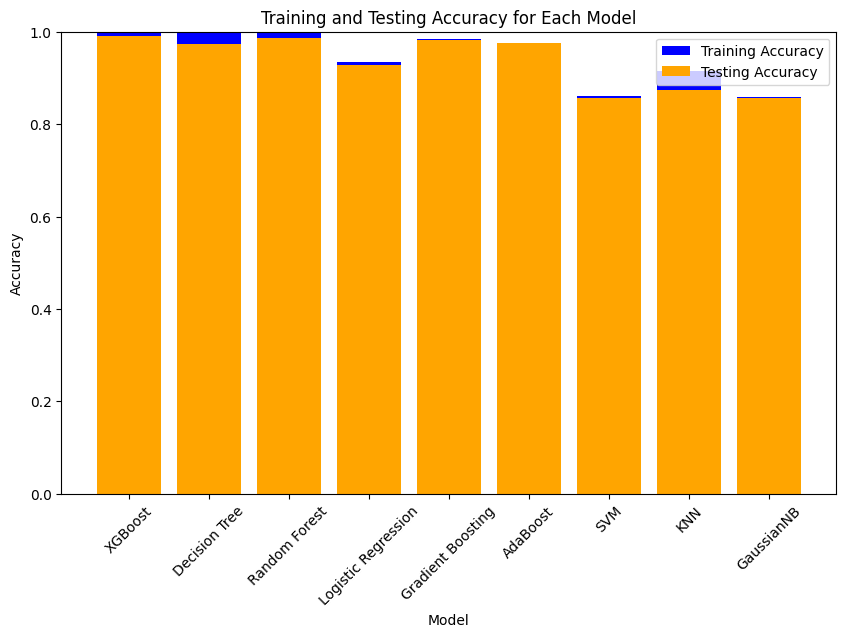

In [15]:
import matplotlib.pyplot as plt

# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB']
train_accuracies = [xgb_model.score(X_train, y_train), dt_model.score(X_train, y_train), rf_model.score(X_train, y_train), lr_model.score(X_train, y_train), gb_model.score(X_train, y_train), ab_model.score(X_train, y_train), svm_model.score(X_train, y_train), knn_model.score(X_train, y_train), gnb_model.score(X_train, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy]

# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, color='blue', label='Training Accuracy')
plt.bar(models, test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.show()


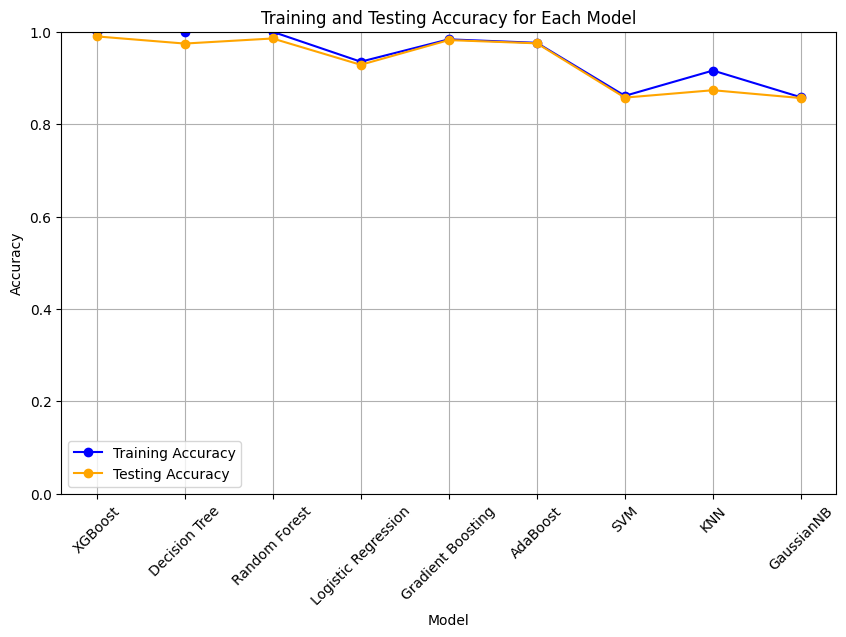

In [16]:
import matplotlib.pyplot as plt

# Create a list of models and their corresponding accuracy scores
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB']
train_accuracies = [xgb_model.score(X_train, y_train), dt_model.score(X_train, y_train), rf_model.score(X_train, y_train), lr_model.score(X_train, y_train), gb_model.score(X_train, y_train), ab_model.score(X_train, y_train), svm_model.score(X_train, y_train), knn_model.score(X_train, y_train), gnb_model.score(X_train, y_train)]
test_accuracies = [xgb_accuracy, dt_accuracy, rf_accuracy, lr_accuracy, gb_accuracy, ab_accuracy, svm_accuracy, knn_accuracy, gnb_accuracy]

# Plot the training and testing accuracy for each model
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(models, test_accuracies, marker='o', linestyle='-', color='orange', label='Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Each Model')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Stacking Classifier
estimators = [('xgb', xgb_model), ('dt', dt_model), ('rf', rf_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=lr_model)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Stacking Classifier Accuracy: 0.989


In [18]:
# Voting Classifier
voting_model = VotingClassifier(estimators=estimators)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.9885


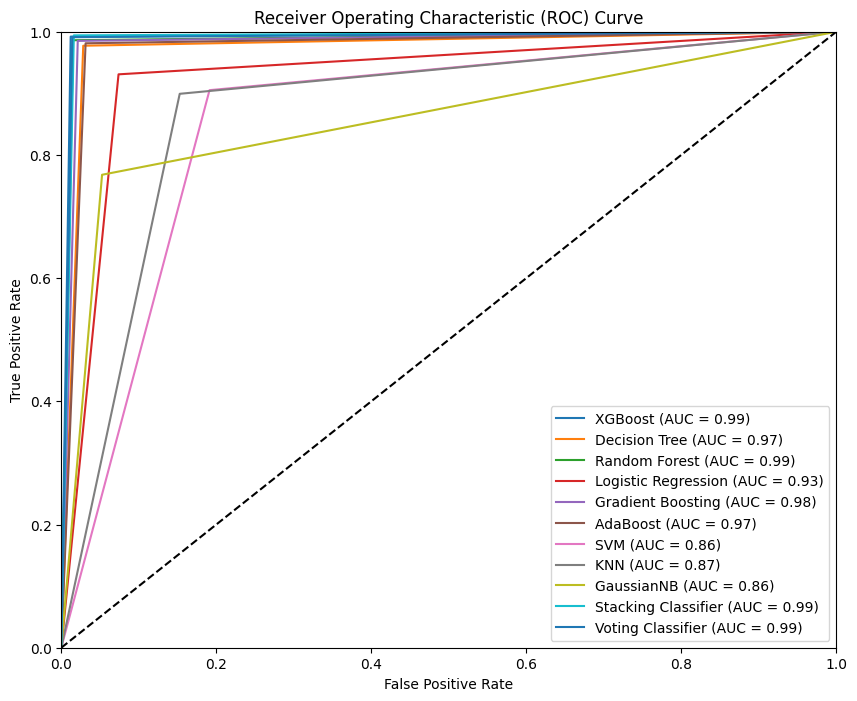

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a list of models and their corresponding predictions
models = ['XGBoost', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'SVM', 'KNN', 'GaussianNB', 'Stacking Classifier', 'Voting Classifier']
predictions = [xgb_pred, dt_pred, rf_pred, lr_pred, gb_pred, ab_pred, svm_pred, knn_pred, gnb_pred, stacking_pred, voting_pred]

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model, prediction in zip(models, predictions):
    fpr, tpr, _ = roc_curve(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    plt.plot(fpr, tpr, label=model + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [21]:
# Print confusion matrix report for each model
for model, prediction in zip(models, predictions):
    cm = confusion_matrix(y_test, prediction)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    print("Model:", model)
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("------------------------------")


Model: XGBoost
Confusion Matrix:
[[ 976   12]
 [   8 1004]]
Accuracy: 0.99
Precision: 0.9881889763779528
Recall: 0.9920948616600791
F1 Score: 0.990138067061144
------------------------------
Model: Decision Tree
Confusion Matrix:
[[960  28]
 [ 23 989]]
Accuracy: 0.9745
Precision: 0.9724680432645034
Recall: 0.9772727272727273
F1 Score: 0.9748644652538196
------------------------------
Model: Random Forest
Confusion Matrix:
[[973  15]
 [ 14 998]]
Accuracy: 0.9855
Precision: 0.9851924975320829
Recall: 0.9861660079051383
F1 Score: 0.9856790123456789
------------------------------
Model: Logistic Regression
Confusion Matrix:
[[915  73]
 [ 70 942]]
Accuracy: 0.9285
Precision: 0.9280788177339901
Recall: 0.9308300395256917
F1 Score: 0.9294523926985692
------------------------------
Model: Gradient Boosting
Confusion Matrix:
[[967  21]
 [ 15 997]]
Accuracy: 0.982
Precision: 0.9793713163064833
Recall: 0.9851778656126482
F1 Score: 0.9822660098522167
------------------------------
Model: AdaBoost
